# 📊 Project Introduction: COVID-19 Research Data Exploration

This project focuses on analyzing the **CORD-19 metadata.csv dataset** to explore publication trends, clean and prepare data, and visualize insights. It is divided into four main parts:

---

## Part 1: Data Loading & Basic Exploration (2-3 hours)
- Download and load the `metadata.csv` file into a pandas DataFrame.  
- Inspect the structure, first few rows, and overall dimensions.  
- Check column data types, missing values, and generate summary statistics.  

---

## Part 2: Data Cleaning & Preparation (2-3 hours)
- Handle missing data by removing or filling values.  
- Convert date columns to datetime format and extract publication year.  
- Create additional features such as **abstract word count**.  

---

## Part 3: Data Analysis & Visualization (3-4 hours)
- Analyze publication counts by year.  
- Identify top journals and frequent title words.  
- Visualize insights using:  
  - Line plots (publications over time)  
  - Bar charts (top journals)  
  - Word clouds (title keywords)  
  - Distribution plots (paper counts by source)  

---

## Part 4: Streamlit Application
- Build a **simple interactive app** with:  
  - Title and description layout  
  - Widgets (sliders, dropdowns)  
  - Integrated visualizations  
  - Sample data display  

---


## 1: Load the Data

🔹**Load Data**

In [1]:
import pandas as pd

# Load metadata.csv into DataFrame
df = pd.read_csv("data/metadata.csv", low_memory=False)

# Preview first rows
print(df.head())

   cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid pubmed_id license  \
0  PMC35282  11472636   no-cc   
1  PMC59543  11667967   no-cc   
2  PMC59549  11667972   no-cc

🔹 **Basic Data Exploration**

In [2]:
# Shape of the dataset
print("Shape:", df.shape)

Shape: (1056660, 19)


In [3]:
# Data types
print(df.dtypes)

cord_uid             object
sha                  object
source_x             object
title                object
doi                  object
pmcid                object
pubmed_id            object
license              object
abstract             object
publish_time         object
authors              object
journal              object
mag_id              float64
who_covidence_id     object
arxiv_id             object
pdf_json_files       object
pmc_json_files       object
url                  object
s2_id               float64
dtype: object


In [4]:
# Missing values
print(df.isnull().sum())


cord_uid                  0
sha                  682894
source_x                  0
title                   503
doi                  399880
pmcid                667089
pubmed_id            557728
license                   0
abstract             235542
publish_time           1814
authors               23869
journal               87322
mag_id              1056660
who_covidence_id     573725
arxiv_id            1042411
pdf_json_files       682894
pmc_json_files       740918
url                  369726
s2_id                 80192
dtype: int64


In [5]:
# Basic statistics
print(df.describe())

       mag_id         s2_id
count     0.0  9.764680e+05
mean      NaN  2.175871e+08
std       NaN  5.312281e+07
min       NaN  9.600000e+01
25%       NaN  2.211411e+08
50%       NaN  2.320829e+08
75%       NaN  2.373948e+08
max       NaN  2.491936e+08


## 2: Data Cleaning and Preparation

🔹**Handle Missing Data**

In [6]:
# Drop columns with too many missing values
df_clean = df.dropna(axis=1, thresh=len(df)*0.5)


In [7]:
# Fill missing values in 'journal' with 'Unknown'
# If df_clean came from filtering, always copy
df_clean = df.copy()

# Now it's safe to modify
df_clean["journal"] = df_clean["journal"].fillna("Unknown")

🔹**Prepare Data for Analysis**

In [8]:

# ✅ Convert 'publish_time' column to datetime safely
df_clean['publish_time'] = pd.to_datetime(
    df_clean['publish_time'].astype(str), errors="coerce"
)

# ✅ Extract year (only if publish_time is valid)
df_clean['year'] = df_clean['publish_time'].dt.year

# ✅ Create abstract word count
df_clean['abstract_word_count'] = (
    df_clean['abstract'].fillna("").apply(lambda x: len(x.split()))
)


In [9]:
# df_display = df_clean.copy()
# df_display["publish_time"] = df_display["publish_time"].astype(str)

# st.dataframe(df_display.head())

## 3: Data Analysis and Visualization

🔹 **Basic Analysis**

In [10]:
# Count papers by year
papers_per_year = df_clean['year'].value_counts().sort_index()

# Top journals
top_journals = df_clean['journal'].value_counts().head(10)

# Frequent words in titles
from collections import Counter
import re

titles = " ".join(df_clean['title'].dropna())
words = re.findall(r'\w+', titles.lower())
word_freq = Counter(words).most_common(20)

🔹**Visualizations**

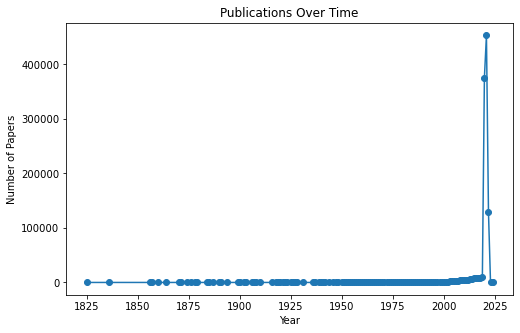

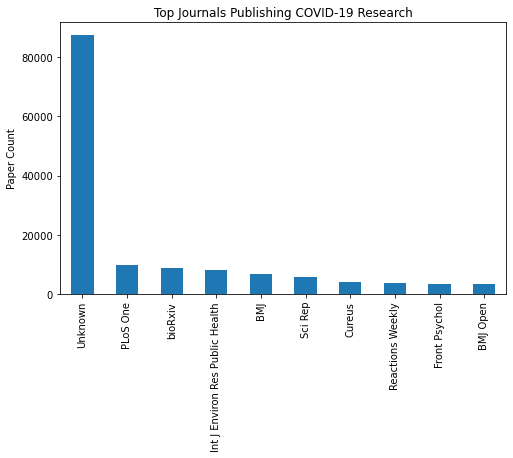

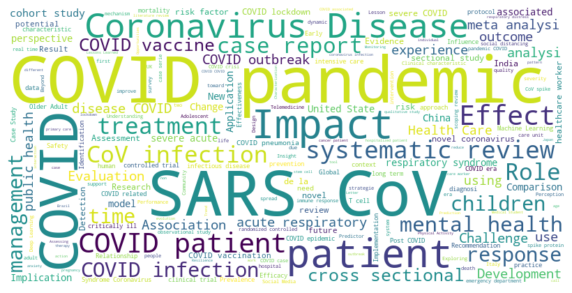

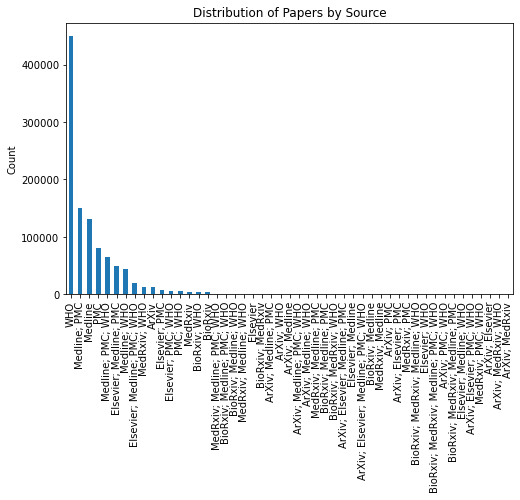

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Publications over time
papers_per_year.plot(kind="line", marker="o", figsize=(8,5))
plt.title("Publications Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.show()

# Top journals bar chart
top_journals.plot(kind="bar", figsize=(8,5))
plt.title("Top Journals Publishing COVID-19 Research")
plt.ylabel("Paper Count")
plt.show()

# Word cloud of titles
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(titles)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Distribution by source
df_clean['source_x'].value_counts().plot(kind="bar", figsize=(8,5))
plt.title("Distribution of Papers by Source")
plt.ylabel("Count")
plt.show()

## 4: Streamlit Application

🔹**Simple Streamlit App**

In [12]:
import streamlit as st
import altair as alt

st.title("CORD-19 COVID-19 Research Explorer")
st.write("Explore research publications from the CORD-19 dataset")

# ✅ Fix datetime issue for display only
df_display = df_clean.copy()
if "publish_time" in df_display.columns:
    df_display["publish_time"] = df_display["publish_time"].astype(str)

# Show sample data
st.subheader("Sample Data")
st.dataframe(df_display.head())

# Interactive: select year
year = st.slider("Select Year", int(df_clean['year'].min()), int(df_clean['year'].max()))
st.write("Papers in selected year:", (df_clean['year'] == year).sum())

# Publications over time chart
st.subheader("Publications Over Time")
st.line_chart(papers_per_year)

# Top journals
st.subheader("Top Journals")
st.bar_chart(top_journals)


2025-09-21 12:17:51.463 
  command:

    streamlit run C:\Users\ADMIN\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


StreamlitAPIException: ('Did not pass numpy.dtype object', 'Conversion failed for column mag_id with type float64')